# Multi-layer Perceptron (MLP):
Multi-layer perceptron is a type of feedforward neural network that uses multiple layers of interconnected nodes or "neurons" to process inputs. Each layer uses a nonlinear activation function to introduce nonlinearity into the model, allowing it to learn more complex relationships between inputs and outputs.\
MLPs are commonly used for classification and regression tasks, and are particularly well-suited for problems where the relationships between inputs and outputs are nonlinear.

In [17]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])

Epoch 1/100
7/7 [==============================] - 0s 4ms/step - loss: nan - mae: nan   
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: nan - mae: nan
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: nan - mae: nan
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: nan - mae: nan
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: nan - mae: nan
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 11/100
7/7 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 12/100
7/7 [==============================]

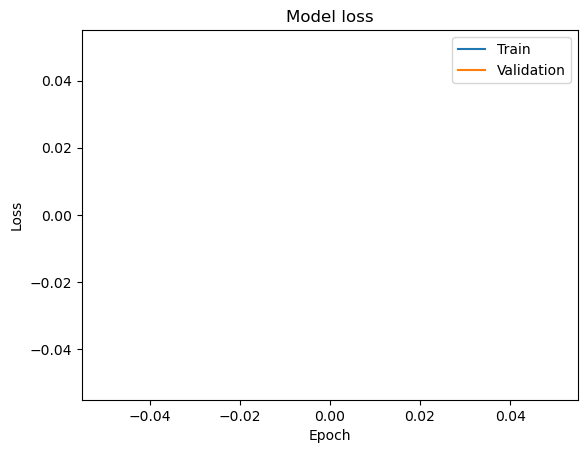

In [18]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

---
## Early stopping of epochs

Epoch 1/100
7/7 [==============================] - 0s 71ms/step - loss: nan - val_loss: nan
Epoch 2/100
7/7 [==============================] - 0s 20ms/step - loss: nan - val_loss: nan
Epoch 3/100
7/7 [==============================] - 0s 17ms/step - loss: nan - val_loss: nan
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: nan - val_loss: nan
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: nan - val_loss: nan


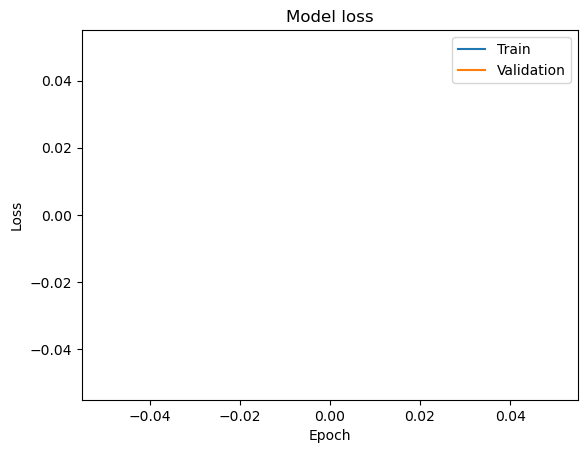

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()